In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import precision_score,recall_score,f1_score,classification_report
df=pd.read_csv("solar_panel.csv")
#RENAME
list_drop = ['Timestamp']
df.drop(list_drop, axis=1, inplace=True)
df_cols=['age','gender','education','income','area','basic_idea','awareness','using','influence','opinion','apartment','space','adv/disadv','alt_power','gov_scheme','ready_to_use','factor','plan_to_use','afford','compromise','change_in_weather','service_centre','inverter','contribution_towards_clean_energy','target']
df.columns = df_cols
#LABELENCODING
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for i in df_cols:
    df[i]=labelencoder.fit_transform(df[i])
df.isnull().sum()
Y=df.loc[:,'target']
X=df.loc[:,df.columns!='target']
df.dtypes
#MIM-MAX NORMALIZATION
from sklearn.preprocessing import MinMaxScaler
norm=MinMaxScaler()
X=norm.fit_transform(X)
X=pd.DataFrame(X)
X.describe()
#SPLITTING THE DATA
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=2)
print(X_train)
print(X_test)

      0    1         2         3    4    5         6    7         8    9   \
470  1.0  0.0  0.333333  1.000000  1.0  1.0  0.000000  0.0  0.333333  1.0   
76   0.0  0.0  0.333333  1.000000  0.0  1.0  1.000000  1.0  0.666667  1.0   
596  0.0  1.0  0.333333  1.000000  0.0  1.0  0.666667  0.0  0.666667  1.0   
564  0.0  1.0  0.333333  1.000000  1.0  0.0  0.666667  0.0  0.333333  1.0   
407  0.0  1.0  0.333333  0.666667  0.0  0.0  1.000000  0.0  0.666667  1.0   
..   ...  ...       ...       ...  ...  ...       ...  ...       ...  ...   
534  0.0  0.0  0.333333  1.000000  1.0  1.0  0.666667  1.0  1.000000  1.0   
584  0.0  1.0  1.000000  1.000000  0.0  1.0  0.666667  0.0  0.333333  1.0   
493  0.0  1.0  0.333333  1.000000  0.0  1.0  0.666667  0.0  0.333333  1.0   
527  0.0  1.0  0.333333  1.000000  0.0  1.0  0.000000  0.0  0.333333  1.0   
168  0.0  1.0  0.333333  0.666667  1.0  0.0  0.666667  1.0  0.333333  0.0   

     ...   14   15        16   17   18   19   20   21   22   23  
470  ... 

In [2]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train,Y_train)
Y_pred=classifier.predict(X_test)
Y_pred1=classifier.predict(X_train)
from sklearn.metrics import classification_report,confusion_matrix
#print("Train Data:",classification_report(Y_train,Y_pred1),sep="\n")
#print("Test Data:",classification_report(Y_test,Y_pred),sep="\n")
print(confusion_matrix(Y_test,Y_pred))
print("----------------test data-------------")
print("PRECISION:",precision_score(Y_test,Y_pred,average="binary"))
print("F1 SCORE:",f1_score(Y_test,Y_pred,average="binary"))
print("RECALL SCORE:",recall_score(Y_test,Y_pred,average="binary"))
print("-----------------train data------------")
print("PRECISION:",precision_score(Y_train,Y_pred1,average="binary"))
print("F1 SCORE:",f1_score(Y_train,Y_pred1,average="binary"))
print("RECALL SCORE:",recall_score(Y_train,Y_pred1,average="binary"))
print("accuracy train",classifier.score(X_train, Y_train))
print("accuracy test",classifier.score(X_test, Y_test))

[[  1  12]
 [  1 166]]
----------------test data-------------
PRECISION: 0.9325842696629213
F1 SCORE: 0.9623188405797101
RECALL SCORE: 0.9940119760479041
-----------------train data------------
PRECISION: 0.9315403422982885
F1 SCORE: 0.9633375474083439
RECALL SCORE: 0.9973821989528796
accuracy train 0.9304556354916067
accuracy test 0.9277777777777778


In [3]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='linear', random_state=3)  
classifier.fit(X_train, Y_train)
Y_pred1=classifier.predict(X_train)  
Y_pred= classifier.predict(X_test)  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(Y_test, Y_pred) 
print(cm)
print("----------------test data-------------")
print("PRECISION:",precision_score(Y_test,Y_pred,average="binary"))
print("F1 SCORE:",f1_score(Y_test,Y_pred,average="binary"))
print("RECALL SCORE:",recall_score(Y_test,Y_pred,average="binary"))
print("-----------------train data------------")
print("PRECISION:",precision_score(Y_train,Y_pred1,average="binary"))
print("F1 SCORE:",f1_score(Y_train,Y_pred1,average="binary"))
print("RECALL SCORE:",recall_score(Y_train,Y_pred1,average="binary"))
#print("Train Data:",classification_report(Y_train,Y_pred1))
#print("Test Data:",classification_report(Y_test,Y_pred))
print("accuracy tarin:",classifier.score(X_train, Y_train))
print("accuracy test:",classifier.score(X_test, Y_test))

[[  0  13]
 [  0 167]]
----------------test data-------------
PRECISION: 0.9277777777777778
F1 SCORE: 0.962536023054755
RECALL SCORE: 1.0
-----------------train data------------
PRECISION: 0.9160671462829736
F1 SCORE: 0.9561952440550687
RECALL SCORE: 1.0
accuracy tarin: 0.9160671462829736
accuracy test: 0.9277777777777778


In [4]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,Y_train)
Y_pred=classifier.predict(X_test)
Y_pred
Y_pred1=classifier.predict(X_train)  

from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(Y_test,Y_pred)
cm

accuracy=accuracy_score(Y_test,Y_pred)
accuracy
print("----------------test data-------------")
print("PRECISION:",precision_score(Y_test,Y_pred,average="binary"))
print("F1 SCORE:",f1_score(Y_test,Y_pred,average="binary"))
print("RECALL SCORE:",recall_score(Y_test,Y_pred,average="binary"))
print("-----------------train data------------")
print("PRECISION:",precision_score(Y_train,Y_pred1,average="binary"))
print("F1 SCORE:",f1_score(Y_train,Y_pred1,average="binary"))
print("RECALL SCORE:",recall_score(Y_train,Y_pred1,average="binary"))
#print("Train Data:",classification_report(Y_train,Y_pred1),sep="\n")
#print("Test Data:",classification_report(Y_test,Y_pred),sep="\n")
print("accuracy train",classifier.score(X_train, Y_train))
print("accuracy test",classifier.score(X_test, Y_test))

----------------test data-------------
PRECISION: 0.9277777777777778
F1 SCORE: 0.962536023054755
RECALL SCORE: 1.0
-----------------train data------------
PRECISION: 0.9182692307692307
F1 SCORE: 0.9573934837092731
RECALL SCORE: 1.0
accuracy train 0.9184652278177458
accuracy test 0.9277777777777778


In [5]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(X_train, Y_train) #training the model is doing here
Y_pred = model.predict(X_test)
Y_pred1=model.predict(X_train)  
from sklearn.metrics import confusion_matrix
cm=np.array(confusion_matrix(Y_test,Y_pred))
print(cm,"is the confusion_matrix")
#print("Train Data:",classification_report(Y_train,Y_pred1),sep="\n")
#print("Test Data:",classification_report(Y_test,Y_pred),sep="\n")
print("----------------test data-------------")
print("PRECISION:",precision_score(Y_test,Y_pred,average="binary"))
print("F1 SCORE:",f1_score(Y_test,Y_pred,average="binary"))
print("RECALL SCORE:",recall_score(Y_test,Y_pred,average="binary"))
print("-----------------train data------------")
print("PRECISION:",precision_score(Y_train,Y_pred1,average="binary"))
print("F1 SCORE:",f1_score(Y_train,Y_pred1,average="binary"))
print("RECALL SCORE:",recall_score(Y_train,Y_pred1,average="binary"))
print("accuracy train",classifier.score(X_train, Y_train))
print("accuracy test",classifier.score(X_test, Y_test))

[[  2  11]
 [ 13 154]] is the confusion_matrix
----------------test data-------------
PRECISION: 0.9333333333333333
F1 SCORE: 0.927710843373494
RECALL SCORE: 0.9221556886227545
-----------------train data------------
PRECISION: 0.9389920424403183
F1 SCORE: 0.9328063241106719
RECALL SCORE: 0.9267015706806283
accuracy train 0.9184652278177458
accuracy test 0.9277777777777778


In [6]:
1# Fitting Decision Tree classifier to the training set
from sklearn.tree import DecisionTreeClassifier
classifier= DecisionTreeClassifier(max_depth=1)
classifier.fit(X_train, Y_train)

Y_pred=classifier.score(X_train, Y_train) 
Y_pred1=classifier.score(X_test, Y_test)

#Predicting the test set result
Y_pred=classifier.predict(X_test)
Y_pred1=classifier.predict(X_train)


from sklearn.metrics import accuracy_score
#ac=accuracy_score(Y_test,a) 
#Creating the Confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score 
cm=confusion_matrix(Y_test,Y_pred) 
print(cm) 
#print(ac)
#print("Train Data:",classification_report(Y_train,Y_pred1),sep="\n")
#print("Test Data:",classification_report(Y_test,Y_pred),sep="\n")
print("----------------test data-------------")
print("PRECISION:",precision_score(Y_test,Y_pred,average="binary"))
print("F1 SCORE:",f1_score(Y_test,Y_pred,average="binary"))
print("RECALL SCORE:",recall_score(Y_test,Y_pred,average="binary"))
print("-----------------train data------------")
print("PRECISION:",precision_score(Y_train,Y_pred1,average="binary"))
print("F1 SCORE:",f1_score(Y_train,Y_pred1,average="binary"))
print("RECALL SCORE:",recall_score(Y_train,Y_pred1,average="binary"))
print("accuracy train",classifier.score(X_train, Y_train))
print("accuracy test",classifier.score(X_test, Y_test))

[[  0  13]
 [  0 167]]
----------------test data-------------
PRECISION: 0.9277777777777778
F1 SCORE: 0.962536023054755
RECALL SCORE: 1.0
-----------------train data------------
PRECISION: 0.9160671462829736
F1 SCORE: 0.9561952440550687
RECALL SCORE: 1.0
accuracy train 0.9160671462829736
accuracy test 0.9277777777777778


In [7]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
abc = AdaBoostClassifier(n_estimators=200)
# Train Adaboost Classifer
abc.fit(X_train, Y_train)

#Predict the response for test dataset
Y_pred = abc.predict(X_test)
#print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("----------------test data-------------")
print("PRECISION:",precision_score(Y_test,Y_pred,average="binary"))
print("F1 SCORE:",f1_score(Y_test,Y_pred,average="binary"))
print("RECALL SCORE:",recall_score(Y_test,Y_pred,average="binary"))
print("-----------------train data------------")
print("PRECISION:",precision_score(Y_train,Y_pred1,average="binary"))
print("F1 SCORE:",f1_score(Y_train,Y_pred1,average="binary"))
print("RECALL SCORE:",recall_score(Y_train,Y_pred1,average="binary"))
print("accuracy train",classifier.score(X_train, Y_train))
print("accuracy test",classifier.score(X_test, Y_test))

----------------test data-------------
PRECISION: 0.936046511627907
F1 SCORE: 0.9498525073746313
RECALL SCORE: 0.9640718562874252
-----------------train data------------
PRECISION: 0.9160671462829736
F1 SCORE: 0.9561952440550687
RECALL SCORE: 1.0
accuracy train 0.9160671462829736
accuracy test 0.9277777777777778


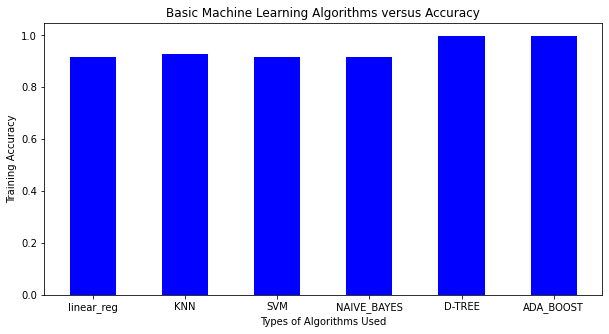

In [8]:
import numpy as np
import matplotlib.pyplot as plt
# Dataset generation
data_dict = {'linear_reg':0.9184652278177458, 'KNN':0.9280575539568345, 'SVM':0.9160671462829736, 'NAIVE_BAYES':0.9184652278177458, 'D-TREE':0.9976019184652278, 'ADA_BOOST':0.9976019184652278}
courses = list(data_dict.keys())
values = list(data_dict.values())
fig = plt.figure(figsize = (10, 5))
#  Bar plot
plt.bar(courses, values, color ='blue',
        width = 0.5)
plt.xlabel("Types of Algorithms Used")
plt.ylabel("Training Accuracy")
plt.title("Basic Machine Learning Algorithms versus Accuracy")
plt.show()

Text(0, 0.5, 'training accuracy and testing accuracy')

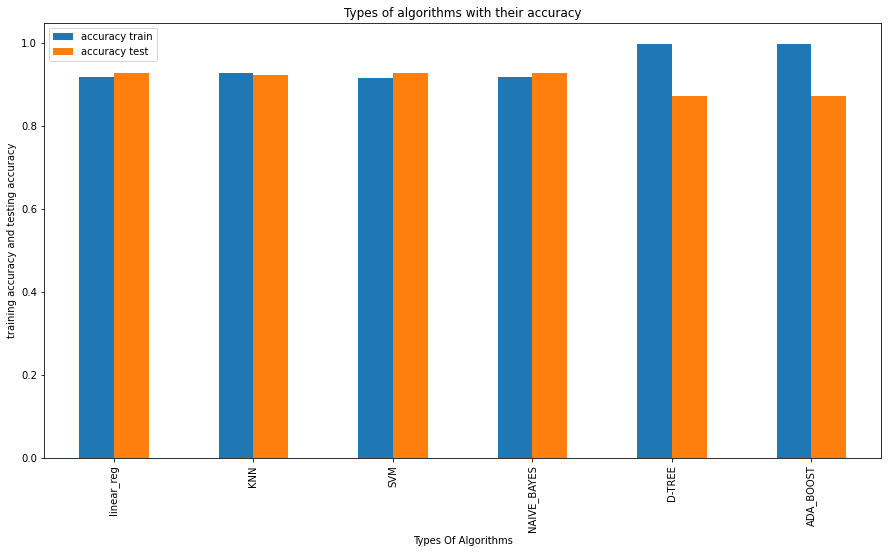

In [9]:
import pandas as pd

plotdata = pd.DataFrame({

    "accuracy train":[0.9184652278177458,0.9280575539568345,0.9160671462829736,0.9184652278177458,0.9976019184652278,0.9976019184652278],

    "accuracy test":[0.9277777777777778,0.9222222222222223,0.9277777777777778,0.9277777777777778,0.8722222222222222,0.8722222222222222]},

index=['linear_reg', 'KNN', 'SVM', 'NAIVE_BAYES','D-TREE','ADA_BOOST'])
plotdata.plot(kind="bar",figsize=(15, 8))

plt.title("Types of algorithms with their accuracy")

plt.xlabel("Types Of Algorithms")

plt.ylabel("training accuracy and testing accuracy")